### SVC Implementation

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as snb 
import matplotlib.pyplot as plt 
%matplotlib inline

In [1]:
from sklearn.datasets import make_classification

In [22]:
X,Y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)

In [23]:
X = pd.DataFrame(X, columns=["df1", "df2"])

<Axes: xlabel='df1', ylabel='df2'>

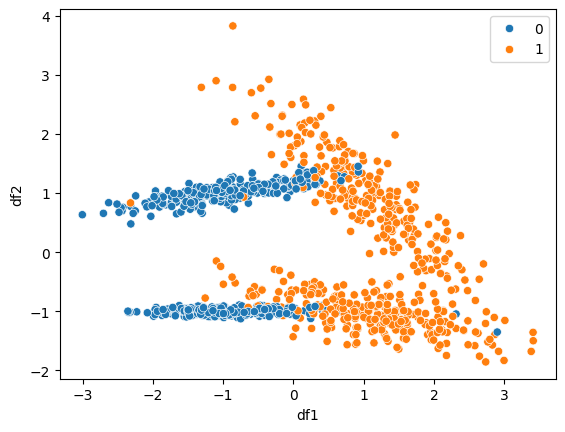

In [24]:
snb.scatterplot(x=X["df1"], y=X["df2"], hue=Y)

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=10, test_size=0.25)

In [27]:
model = SVC(kernel="linear")

In [32]:
rbf = SVC(kernel="rbf")

In [33]:
model.fit(X_train, Y_train)
rbf.fit(X_train, Y_train)

SVC()

In [34]:
Y_pred = model.predict(X_test)
Y_pred_1 = rbf.predict(X_test)

In [30]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       138
           1       0.88      0.89      0.89       112

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250



In [35]:
print(classification_report(Y_test, Y_pred_1))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       138
           1       0.92      0.96      0.94       112

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [37]:
print(accuracy_score(Y_test, Y_pred_1))
print(accuracy_score(Y_test, Y_pred))

0.948
0.9


In [ ]:
#RBF Kernel
#Polynomial Kernel

In [38]:
from sklearn.model_selection import GridSearchCV

param = {"C":[0.1,1,10,100,1000], "gamma":[1,0.1,0.01, 0.001, 0.0001], "kernel":["rbf"]}

In [40]:
grid = GridSearchCV(SVC(), param_grid=param, cv=5, verbose=3,refit=True)

In [41]:
grid.fit(X_train, Y_train)
grid.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [42]:
Y_pred_2 = grid.predict(X_test)
print(classification_report(Y_test, Y_pred_2))
print(accuracy_score(Y_test, Y_pred_2))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       138
           1       0.93      0.98      0.96       112

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

0.96


### SVM Kernel Implementation

In [54]:
x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2,-x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])


In [55]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2,-x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

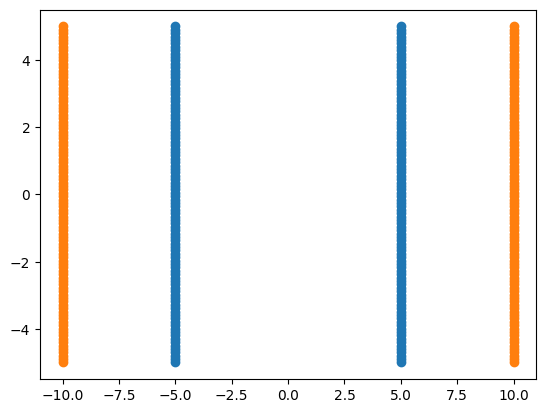

In [56]:
plt.scatter(y1,x1)
plt.scatter(y,x)

In [61]:
df1 = pd.DataFrame(np.vstack([y,x]).T, columns=["X1","X2"])
df1["Y"]=0
df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns=["X1","X2"])
df2["Y"]=1

df = pd.concat([df1, df2])
df.head()

,X1,X2,Y
0,10.0,-5.00000,0
1,10.0,-4.89899,0
2,10.0,-4.79798,0
3,10.0,-4.69697,0
4,10.0,-4.59596,0


In [62]:
df.tail()

,X1,X2,Y
195,-5.0,-4.59596,1
196,-5.0,-4.69697,1
197,-5.0,-4.79798,1
198,-5.0,-4.89899,1
199,-5.0,-5.00000,1


In [65]:
X=df[["X1","X2"]]
Y=df[["Y"]]

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=10, test_size=0.25)

In [67]:
df["X1_Square"] = df["X1"]**2
df["X2_Square"] = df["X2"]**2
df["X1*X2"] = (df["X1"]*df["X2"])
df.head()


,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,10.0,-5.00000,0,100.0,25.000000,-50.000000
1,10.0,-4.89899,0,100.0,24.000102,-48.989899
2,10.0,-4.79798,0,100.0,23.020610,-47.979798
3,10.0,-4.69697,0,100.0,22.061524,-46.969697
4,10.0,-4.59596,0,100.0,21.122845,-45.959596
